<a href="https://colab.research.google.com/github/dldbwls00/datathon-diet-products-prediction/blob/main/fitnessCenter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

체력단련장업 업소정보
https://www.localdata.go.kr/data/dataView.do

In [62]:
import pandas as pd
import numpy as np
import datetime

In [63]:
# connecting google drive - colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [64]:
# loading dataset
import pandas as pd
dataset = pd.read_excel('/content/drive/MyDrive/10_42_01_P_체력단련장업.xlsx')

In [65]:
dataset

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,좌표정보(Y),문화체육업종명,공사립구분명,보험가입여부코드,지도자수,건축물동수,건축물연면적,회원모집총인원,세부업종명,법인명
0,1,체력단련장업,10_42_01_P,3640000,CDFH3301062024000001,2024-01-16,NaN,1,영업/정상,13,...,315702.784401,체력단련장업,사립,NaN,0.0,0.0,4549.00,0.0,NaN,NaN
1,2,체력단련장업,10_42_01_P,3540000,CDFH3301062024000002,2024-01-16,NaN,1,영업/정상,13,...,445672.405855,체력단련장업,사립,NaN,1.0,0.0,1600.75,0.0,NaN,NaN
2,3,체력단련장업,10_42_01_P,4191000,CDFH3301062024000001,2024-01-16,NaN,1,영업/정상,13,...,426011.188064,체력단련장업,사립,NaN,1.0,0.0,324.00,0.0,NaN,NaN
3,4,체력단련장업,10_42_01_P,5310000,CDFH3301062024000001,2024-01-16,NaN,1,영업/정상,13,...,185667.814029,체력단련장업,사립,NaN,2.0,2.0,85609.26,0.0,NaN,NaN
4,5,체력단련장업,10_42_01_P,3430000,CDFH3301062024000001,2024-01-15,NaN,1,영업/정상,13,...,263671.358876,체력단련장업,사립,NaN,0.0,0.0,0.00,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14598,14599,체력단련장업,10_42_01_P,4680000,CDFH3301061989000001,1989-11-10,NaN,1,영업/정상,13,...,273373.743455,체력단련장업,사립,0,NaN,NaN,4400.65,NaN,NaN,NaN
14599,14600,체력단련장업,10_42_01_P,3350000,CDFH3301061989000001,1989-10-31,NaN,1,영업/정상,13,...,196175.464144,체력단련장업,사립,NaN,NaN,3.0,1379.22,NaN,NaN,NaN
14600,14601,체력단련장업,10_42_01_P,3040000,CDFH3301061989000001,1989-10-23,NaN,1,영업/정상,13,...,447900.666026,체력단련장업,사립,NaN,NaN,0.0,0.00,NaN,NaN,NaN
14601,14602,체력단련장업,10_42_01_P,5310000,CDFH3301061989000003,1989-10-11,NaN,1,영업/정상,13,...,187563.552209,체력단련장업,사립,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# 연, 월, 주소 데이터 추출 - 2019~2024
dataset['인허가일자'] = pd.to_datetime(dataset["인허가일자"])
addsplit = dataset['소재지전체주소'].str.split(' ')

fitness_center = pd.DataFrame({
    'year': dataset['인허가일자'].dt.year,
    'month': dataset['인허가일자'].dt.month,
    'city': addsplit.str.get(0),
    'district': addsplit.str.get(1),
    'address': fitness_center['city'] + ' ' + fitness_center['district']
})

fitness_center = fitness_center.loc[(dataset['인허가일자'].dt.year>2018) & (dataset['인허가일자'].dt.year<2024)]
fitness_center.sample(n=10)

,year,month,city,district,address
1235,2023,5,경상북도,문경시,경상북도 문경시
6569,2020,3,충청남도,천안시,충청남도 천안시
7198,2019,8,서울특별시,성동구,서울특별시 성동구
2869,2022,7,부산광역시,동래구,부산광역시 동래구
2794,2022,7,서울특별시,서초구,서울특별시 서초구
7173,2019,9,경기도,성남시,경기도 성남시
4497,2021,9,경상북도,포항시,경상북도 포항시
6199,2020,7,경상북도,구미시,경상북도 구미시
1383,2023,4,경기도,양주시,경기도 양주시
1148,2023,5,경기도,안양시,경기도 안양시


In [68]:
count_year = pd.DataFrame(fitness_center.groupby(['year'])['year'].count())
count_year.columns = ['count']

count_year

,count
year,
2019,974
2020,1220
2021,1685
2022,2029
2023,1830


In [69]:
count_yearandmonth = pd.DataFrame(fitness_center.groupby(['year','month'])['year'].count())
count_yearandmonth.columns = ['count']

count_yearandmonth

count
year month       
2019 1         87
     2         68
     3         80
     4         82
     5         98
     6         78
     7         77
     8         70
     9         83
     10        84
     11        78
     12        89
2020 1         91
     2         85
     3         98
     4        106
     5         72
     6        106
     7        109
     8         95
     9        117
     10       114
     11       107
     12       120
2021 1        120
     2        108
     3        111
     4        138
     5        131
     6        154
     7        151
     8        125
     9        134
     10       146
     11       162
     12       205
2022 1        153
     2        167
     3        176
     4        178
     5        178
     6        178
     7        186
     8        148
     9        133
     10       145
     11       180
     12       207
2023 1        136
     2        161
     3        166
     4        156
     5        147
     6        187
     7        142
     8        163
     9        121
     10       125
     11       153
     12       173

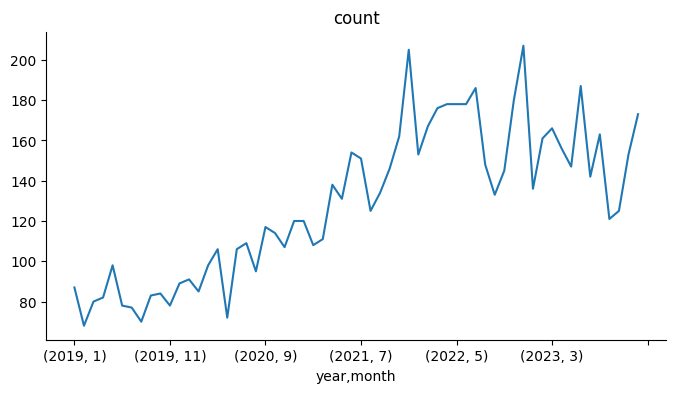

In [70]:
from matplotlib import pyplot as plt
count_yearandmonth['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [72]:
count_city = pd.DataFrame(fitness_center.groupby(['city'])['city'].count())
count_city.columns = ['count']

count_city

,count
city,
강원특별자치도,168
경기도,2175
경상남도,408
경상북도,224
광주광역시,211
대구광역시,335
대전광역시,219
부산광역시,603
서울특별시,1889


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

In [73]:
count_address = pd.DataFrame(fitness_center.groupby(['address'])['address'].count())
count_address.columns = ['count']

count_address

,count
address,
강원특별자치도 강릉시,24
강원특별자치도 동해시,9
강원특별자치도 삼척시,3
강원특별자치도 속초시,6
강원특별자치도 양구군,1
...,...
충청북도 음성군,8
충청북도 제천시,11
충청북도 진천군,6
